In [1]:
# Imports all the needed data

import pandas as pd
import matplotlib.pyplot as plt
# Upon import the first time, I encountered an error which states that the data is not in UTF8
# This code makes sure that the data runs using the code 'ISO-8859-1'
spd = pd.read_csv('spotify-2023.csv', encoding='ISO-8859-1')
spd

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


In [2]:

## Had a little help for this one


def change_utf8(value):
    if isinstance(value, bytes):
        # If the value is a unknown, change it to UTF-8
        value = value.decode('utf-8', errors='ignore')  
    try:
        # Attempt to encode and decode as UTF-8 to check validity
        value.encode('utf-8').decode('utf-8')
        return value  # If successful, return the original string
    except UnicodeEncodeError:
        # If there's an error, remove or replace non-UTF8 characters directly
        return ''.join([char for char in value if ord(char) < 128])

# Loop over each cell and change non-UTF8 characters
for col in spd.columns:
    spd[col] = [change_utf8(cell) if isinstance(cell, str) or isinstance(cell, bytes) else cell for cell in spd[col]]

print(spd)

                              track_name      artist(s)_name  artist_count  \
0    Seven (feat. Latto) (Explicit Ver.)    Latto, Jung Kook             2   
1                                   LALA         Myke Towers             1   
2                                vampire      Olivia Rodrigo             1   
3                           Cruel Summer        Taylor Swift             1   
4                         WHERE SHE GOES           Bad Bunny             1   
..                                   ...                 ...           ...   
948                         My Mind & Me        Selena Gomez             1   
949            Bigger Than The Whole Sky        Taylor Swift             1   
950                 A Veces (feat. Feid)  Feid, Paulo Londra             2   
951                        En La De Ella  Feid, Sech, Jhayco             3   
952                                Alone           Burna Boy             1   

     released_year  released_month  released_day  in_spotify_pl

## Overview of Dataset

How many rows and columns does the dataset contain?
What are the data types of each column? Are there any missing values?

In [4]:
# Basic Function to describe the data set
[rows,columns] = spd.shape

print('Rows of Spotify Data Set:', rows)
print('Columns of Spotify Data Set:', columns)

Rows of Spotify Data Set: 953
Columns of Spotify Data Set: 24


In [5]:
# Iterates each column and identifies the data type
for col in spd:
    print("Data type of ", col, "is ", spd[col].dtype)

Data type of  track_name is  object
Data type of  artist(s)_name is  object
Data type of  artist_count is  int64
Data type of  released_year is  int64
Data type of  released_month is  int64
Data type of  released_day is  int64
Data type of  in_spotify_playlists is  int64
Data type of  in_spotify_charts is  int64
Data type of  streams is  object
Data type of  in_apple_playlists is  int64
Data type of  in_apple_charts is  int64
Data type of  in_deezer_playlists is  object
Data type of  in_deezer_charts is  int64
Data type of  in_shazam_charts is  object
Data type of  bpm is  int64
Data type of  key is  object
Data type of  mode is  object
Data type of  danceability_% is  int64
Data type of  valence_% is  int64
Data type of  energy_% is  int64
Data type of  acousticness_% is  int64
Data type of  instrumentalness_% is  int64
Data type of  liveness_% is  int64
Data type of  speechiness_% is  int64


 playlists or charts.


## Basic Descriptive Statistics

What are the mean, median, and standard deviation of the streams column? What is the distribution of released_year and artist_count? Are there any noticeable trends or outliersrs

In [8]:
# A song has the a non-numeric value in streams, detected by this code
non_numeric_rows = spd[spd['streams'].str.contains('[^0-9.]')]
non_numeric_rows

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
574,Love Grows (Where My Rosemary Goes),Edison Lighthouse,1,1970,1,1,2877,0,BPM110KeyAModeMajorDanceability53Valence75Ener...,16,...,110,A,Major,53,75,69,7,0,17,3


In [9]:
# Replaces 574 streams with 0 as undefined
spd.loc[574, 'streams'] = 0

In [10]:
# To double check
spd.iloc[574]

track_name              Love Grows (Where My Rosemary Goes)
artist(s)_name                            Edison Lighthouse
artist_count                                              1
released_year                                          1970
released_month                                            1
released_day                                              1
in_spotify_playlists                                   2877
in_spotify_charts                                         0
streams                                                   0
in_apple_playlists                                       16
in_apple_charts                                           0
in_deezer_playlists                                      54
in_deezer_charts                                          0
in_shazam_charts                                          0
bpm                                                     110
key                                                       A
mode                                    

In [11]:
# Convert all str in streams into float
Streams = spd['streams'].astype('float')

# Find the mean, median, and standard deviation
print('Mean of streams:', Streams.mean())
print('Median of streams:', Streams.median())
print('Standard Deviation of streams:', Streams.std())


Mean of streams: 513597931.3137461
Median of streams: 290228626.0
Standard Deviation of streams: 566803887.0588316


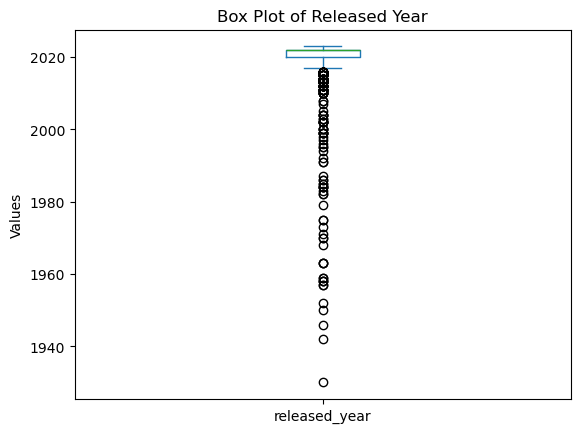

In [12]:
# Box plot for both columns side by side
spd[['released_year']].plot(kind='box')
plt.title('Box Plot of Released Year')
plt.ylabel('Values')
plt.show()



Majority of chart toppers in 2023, are released near the said year. However, considerable amount of outliers can be seen in which songs from the 80's and 60's are still prevalent to this day.

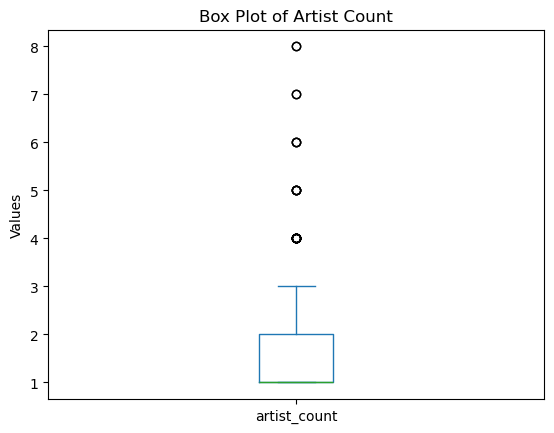

In [14]:
# Box plot for both columns side by side
spd[['artist_count']].plot(kind='box')
plt.title('Box Plot of Artist Count')
plt.ylabel('Values')
plt.show()


One to two artist appears to be the sweet spot in terms of artist count of hit songs. Noticable outliers show that 5-8 artist can also create a hit. 

## Top Performers

Which track has the highest number of streams? Display the top 5 most streamed tracks.
Who are the top 5 most frequent artists based on the number of tracks in the dataset?

In [17]:
# Gets the column of streams for no reason
spd['streams']

0      141381703
1      133716286
2      140003974
3      800840817
4      303236322
         ...    
948     91473363
949    121871870
950     73513683
951    133895612
952     96007391
Name: streams, Length: 953, dtype: object

In [91]:
# Converts it to string, and removes all white spaces since it affects .astype(float)
spd['streams'] = spd['streams'].astype(str).str.strip()

In [97]:
# Converts to a float
spd['streams'] = spd['streams'].astype('float')

In [99]:
# Arrange by number of streams and get the top 5 using the .head and ascending = false
spd.sort_values(by='streams', ascending = False).head(5)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
55,Blinding Lights,The Weeknd,1,2019,11,29,43899,69,3.703895e+09,672,...,171,C#,Major,50,38,80,0,0,9,7
179,Shape of You,Ed Sheeran,1,2017,1,6,32181,10,3.562544e+09,33,...,96,C#,Minor,83,93,65,58,0,9,8
86,Someone You Loved,Lewis Capaldi,1,2018,11,8,17836,53,2.887242e+09,440,...,110,C#,Major,50,45,41,75,0,11,3
620,Dance Monkey,Tones and I,1,2019,5,10,24529,0,2.864792e+09,533,...,98,F#,Minor,82,54,59,69,0,18,10
41,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2,2018,10,9,24094,78,2.808097e+09,372,...,90,D,Major,76,91,50,54,0,7,5


In [101]:
# Single Ranking 
# Counts the values in the artist name column
artist_count_solo = spd['artist(s)_name'].value_counts()
artist_count_solo.head(5)

artist(s)_name
Taylor Swift    34
The Weeknd      22
Bad Bunny       19
SZA             19
Harry Styles    17
Name: count, dtype: int64

In [103]:
# If collabs are separated
expanded_artists_separate = spd['artist(s)_name'].str.split(', ').explode().value_counts()
expanded_artists_separate.head(5)

artist(s)_name
Bad Bunny         40
Taylor Swift      38
The Weeknd        37
SZA               23
Kendrick Lamar    23
Name: count, dtype: int64

## Temporal Trends

Analyze the trends in the number of tracks released over time. Plot the number of tracks released per year.
Does the number of tracks released per month follow any noticeable patterns? Which month sees the most releases?

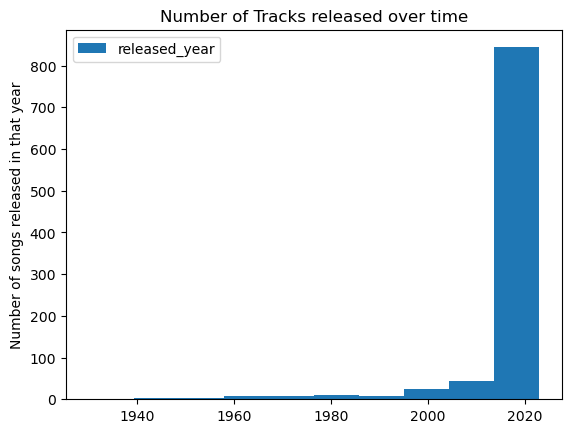

In [24]:
# Graph of Hisogram of Number of released tracks
spd[['released_year']].plot(kind = "hist")
plt.title('Number of Tracks released')
plt.ylabel('Year Released')
plt.show()

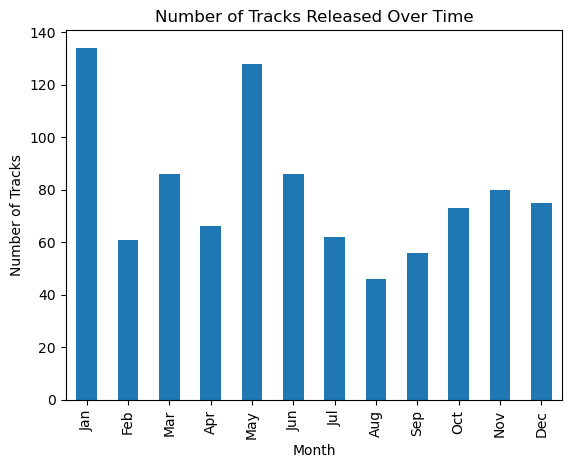

In [106]:
# Group by month and count the occurrences for each month
monthly_counts = spd['released_month'].value_counts().sort_index()

# Plotting as a bar chart
monthly_counts.plot(kind="bar")
plt.title('Number of Tracks Released Over Time')

# Set labels in the x axis
plt.xticks(ticks=range(12), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
])
plt.ylabel('Number of Tracks')
plt.xlabel('Month')
plt.show()

## Genre and Music Characteristics

Examine the correlation between streams and musical attributes like bpm, danceability_%, and energy_%. Which attributes seem to influence streams the most?
Is there a correlation between danceability_% and energy_%? How about valence_% and acousticness_%?

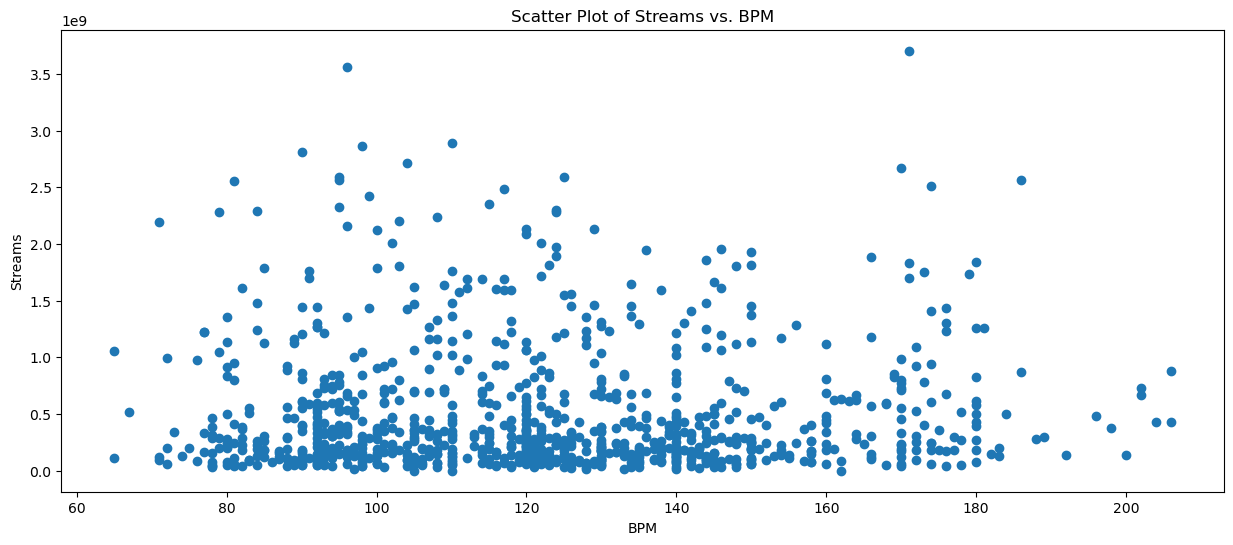

In [27]:
fig1 = plt.figure(figsize=(15, 6))  # Increase figure size for better readability
ax = fig1.add_subplot(111) # Adds a subplot for no reason =)

# Scatter plot with adjustments
ax.scatter(spd['bpm'], spd['streams'])



# Adding labels, title, and grid
ax.set_xlabel('BPM')
ax.set_ylabel('Streams')
ax.set_title('Scatter Plot of Streams vs. BPM')

plt.show()

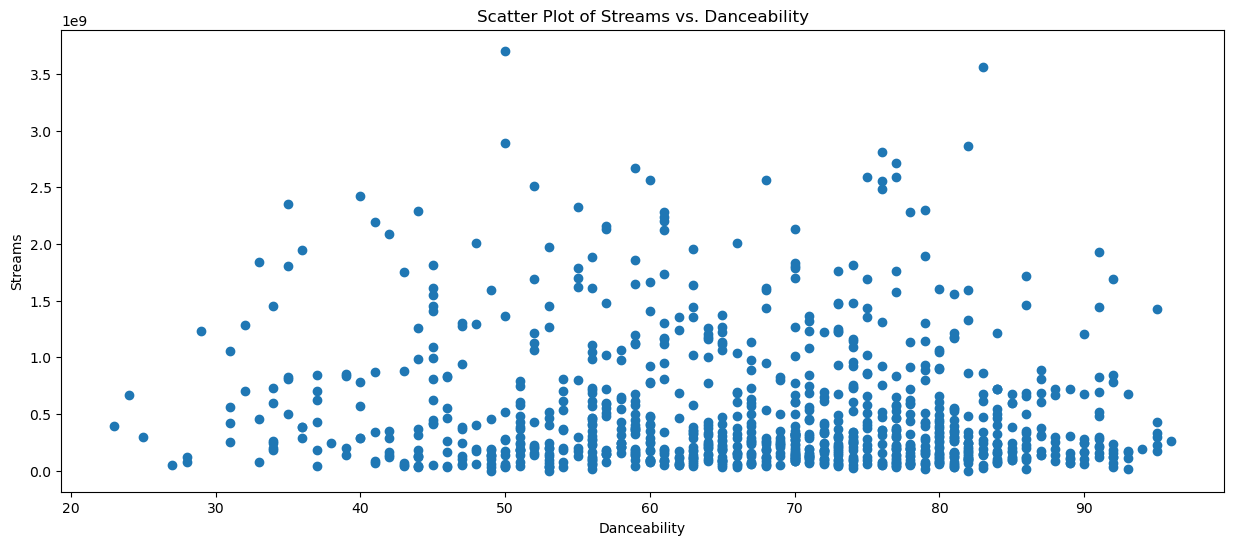

In [28]:
fig2 = plt.figure(figsize=(15, 6))  # Increase figure size for better readability
ax = fig2.add_subplot(111)

# Scatter plot with adjustments
ax.scatter(spd['danceability_%'], spd['streams'])


# Adding labels, title, and grid
ax.set_xlabel('Danceability')
ax.set_ylabel('Streams')
ax.set_title('Scatter Plot of Streams vs. Danceability')

plt.show()

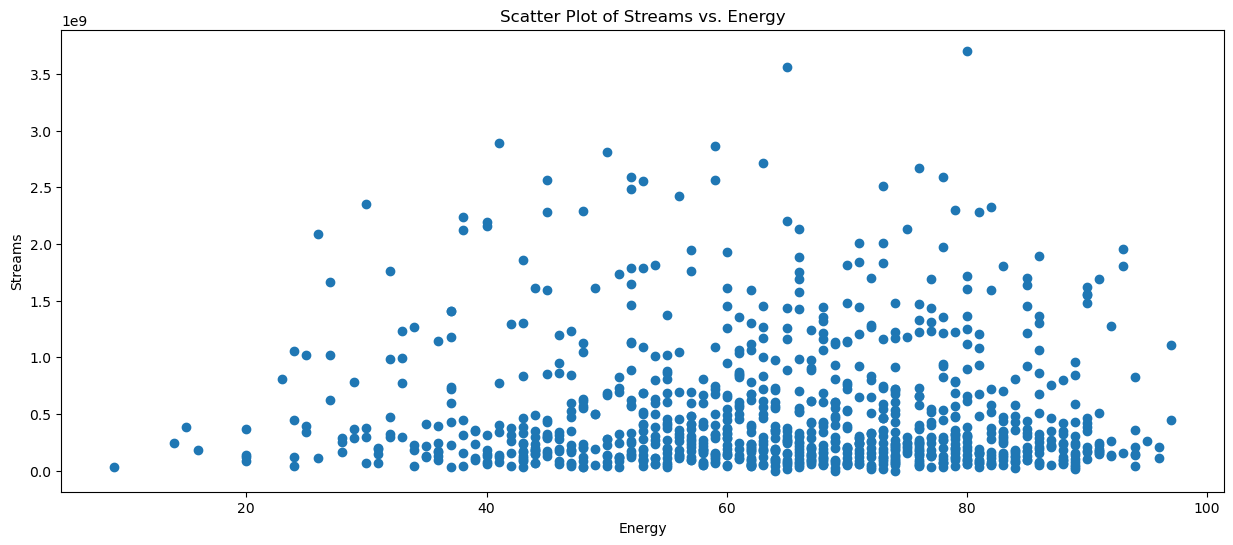

In [29]:
fig3 = plt.figure(figsize=(15, 6))  # Increase figure size for better readability
ax = fig3.add_subplot(111)

# Scatter plot with adjustments
ax.scatter(spd['energy_%'], spd['streams'])



# Adding labels, title, and grid
ax.set_xlabel('Energy')
ax.set_ylabel('Streams')
ax.set_title('Scatter Plot of Streams vs. Energy')

plt.show()

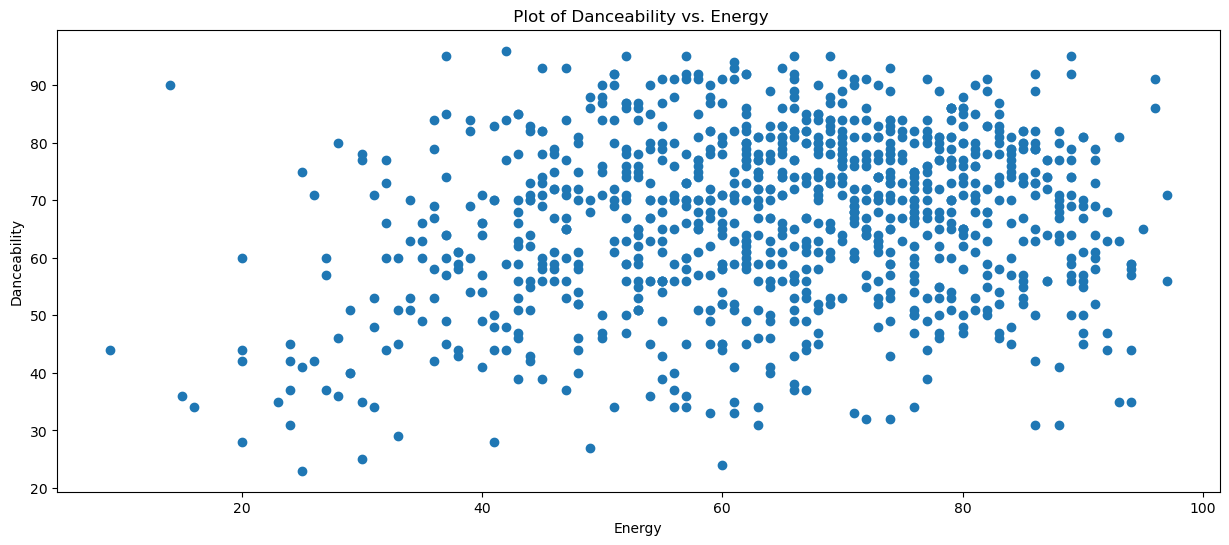

In [30]:
fig4 = plt.figure(figsize=(15, 6))  # Increase figure size for better readability
ax = fig4.add_subplot(111)

# Scatter plot with adjustments
ax.scatter(spd['energy_%'], spd['danceability_%'])



# Adding labels, title, and grid
ax.set_xlabel('Energy')
ax.set_ylabel('Danceability')
ax.set_title(' Plot of Danceability vs. Energy')

plt.show()

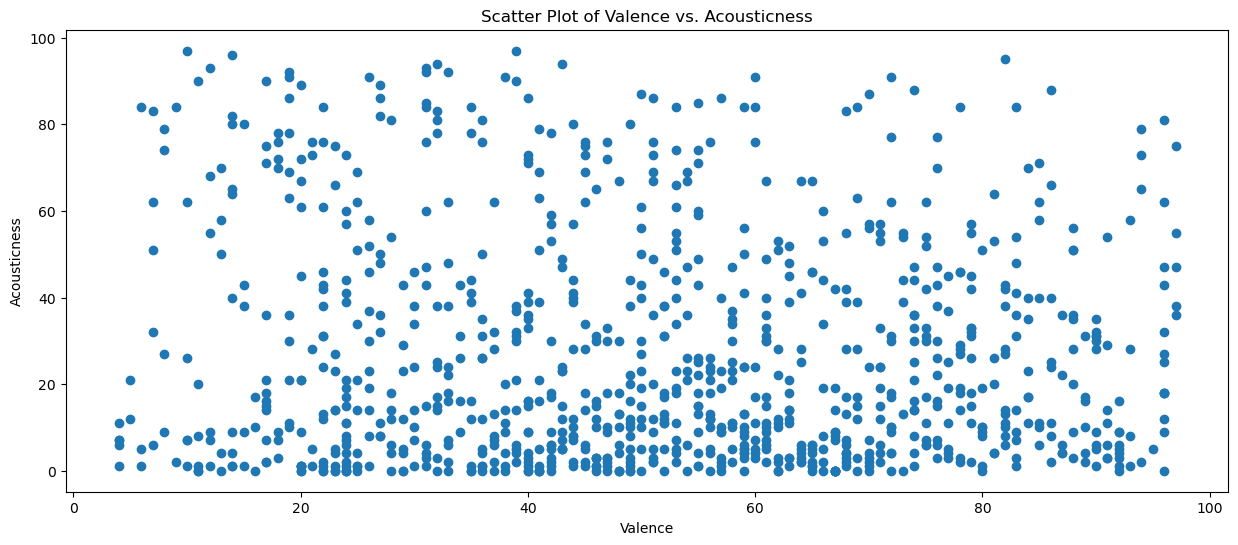

In [31]:
fig5 = plt.figure(figsize=(15, 6))  # Increase figure size for better readability
ax = fig5.add_subplot(111)

# Scatter plot with adjustments
ax.scatter(spd['valence_%'], spd['acousticness_%'])



# Adding labels, title, and grid
ax.set_xlabel('Valence')
ax.set_ylabel('Acousticness')
ax.set_title('Scatter Plot of Valence vs. Acousticness')

plt.show()

## Platform Popularity

How do the numbers of tracks in spotify_playlists, spotify_charts, and apple_playlists compare? Which platform seems to favor the most popular tracks?

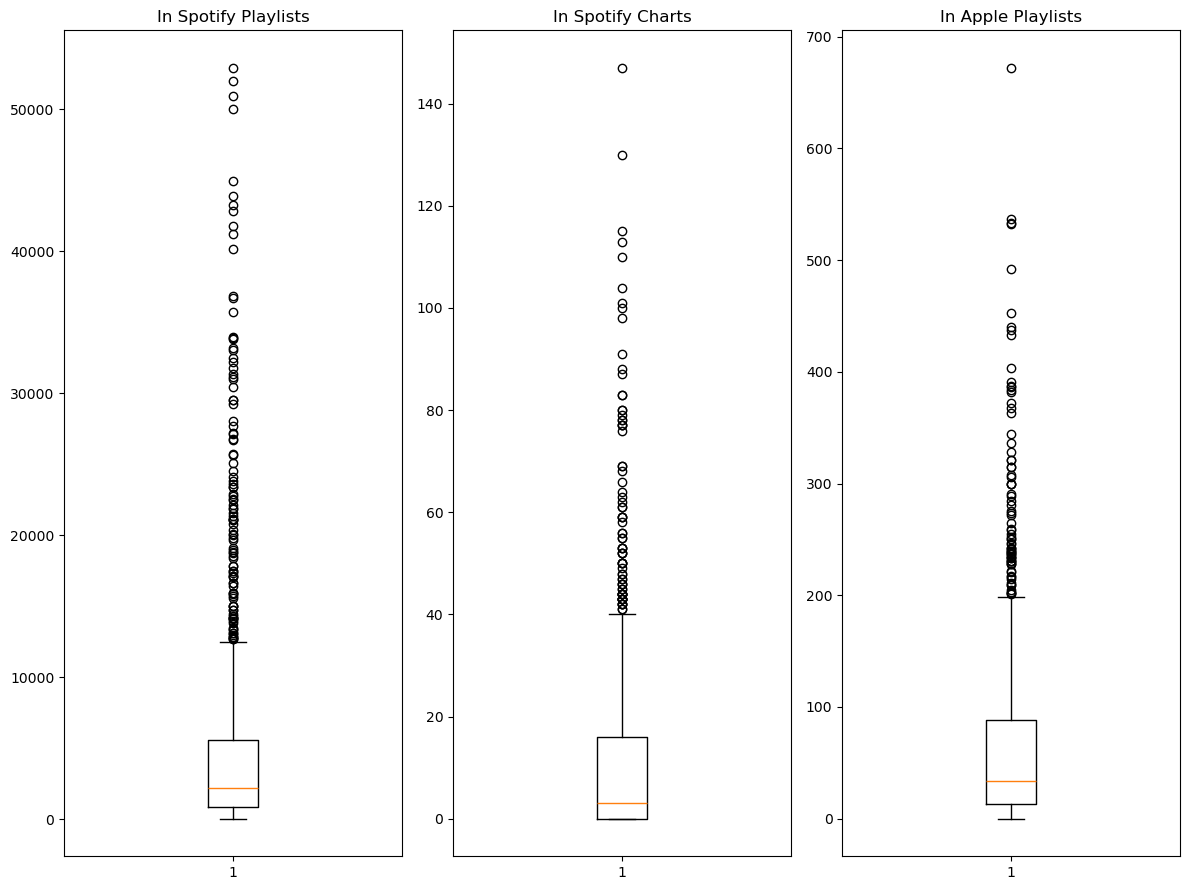

In [33]:
# Creates a figure with a great deal of length
fig6 = plt.figure(figsize = (12, 9))

# Create a subplot for box plot for spotify playlist
spplot = fig6.add_subplot(131)
spplot.boxplot(spd['in_spotify_playlists'])
spplot.set_title("In Spotify Playlists")

# Create a subplot for box plot for spotify charts
scplot = fig6.add_subplot(132)
scplot.boxplot(spd['in_spotify_charts'])
scplot.set_title("In Spotify Charts")

# Create a subplot for box plot for apple playlist
applot = fig6.add_subplot(133)
applot.boxplot(spd['in_apple_playlists'])
applot.set_title("In Apple Playlists")

# make it so that labels are cleanly placed by having a tight layout
plt.tight_layout() 
plt.show()



In [34]:
# Replaces ',' with ''
spd['in_deezer_playlists'] = spd['in_deezer_playlists'].str.replace(',','').astype('int') 
spd

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703.0,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286.0,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974.0,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817.0,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322.0,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363.0,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870.0,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683.0,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612.0,29,...,97,C#,Major,82,67,77,8,0,12,5


In [35]:
# Replaces ',' with '' and fill in NA values with 0
spd['in_shazam_charts'] = spd['in_shazam_charts'].str.replace(',','').fillna(0).astype('int')
spd

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703.0,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286.0,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974.0,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817.0,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322.0,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363.0,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870.0,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683.0,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612.0,29,...,97,C#,Major,82,67,77,8,0,12,5


In [36]:
# Top Songs of the year
top = spd.sort_values(by='streams', ascending = False).head(10)
top = top[['track_name','in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts']].reset_index(drop = 'True')
top

,track_name,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts
0,Blinding Lights,43899,69,672,199,3421,20,0
1,Shape of You,32181,10,33,0,6808,7,0
2,Someone You Loved,17836,53,440,125,1800,0,0
3,Dance Monkey,24529,0,533,167,3595,6,0
4,Sunflower - Spider-Man: Into the Spider-Verse,24094,78,372,117,843,4,69
5,One Dance,43257,24,433,107,3631,0,26
6,STAY (with Justin Bieber),17050,36,492,99,798,31,0
7,Believer,18986,23,250,121,2969,10,31
8,Closer,28032,0,315,159,2179,0,44
9,Starboy,29536,79,281,137,2445,1,140


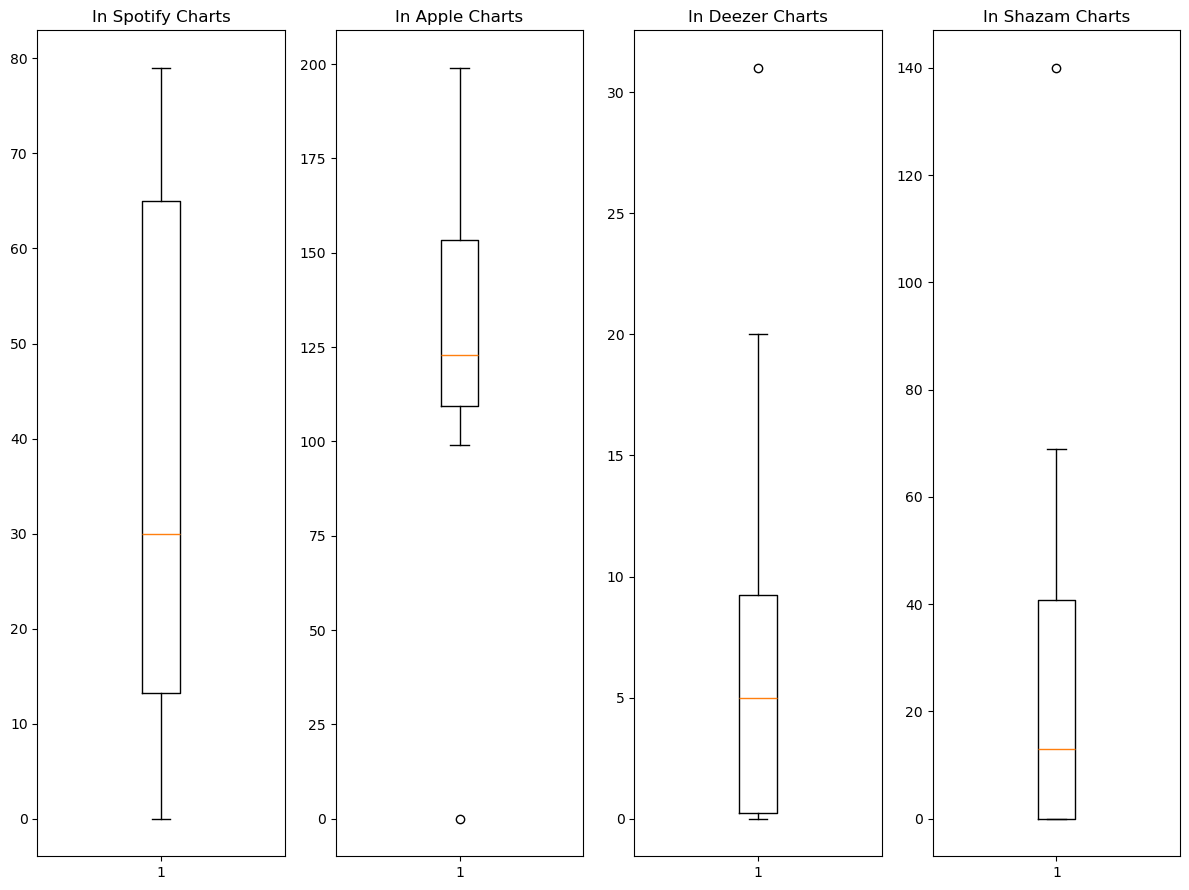

In [37]:
# Creates a figure with a large size
fig7 = plt.figure(figsize = (12, 9))

# Adds a plot for spotify
spTopCPlot = fig7.add_subplot(141)
spTopCPlot.boxplot(top['in_spotify_charts'])
spTopCPlot.set_title("In Spotify Charts")

# Adds a plot for apple music
apTopCPlot = fig7.add_subplot(142)
apTopCPlot.boxplot(top['in_apple_charts'])
apTopCPlot.set_title("In Apple Charts")

# Adds a plot for deezer
deTopCPlot = fig7.add_subplot(143)
deTopCPlot.boxplot(top['in_deezer_charts'])
deTopCPlot.set_title("In Deezer Charts")

# Adds a plot for shazam
shTopCPlot = fig7.add_subplot(144)
shTopCPlot.boxplot(top['in_shazam_charts'])
shTopCPlot.set_title("In Shazam Charts")


plt.tight_layout() 
plt.show()

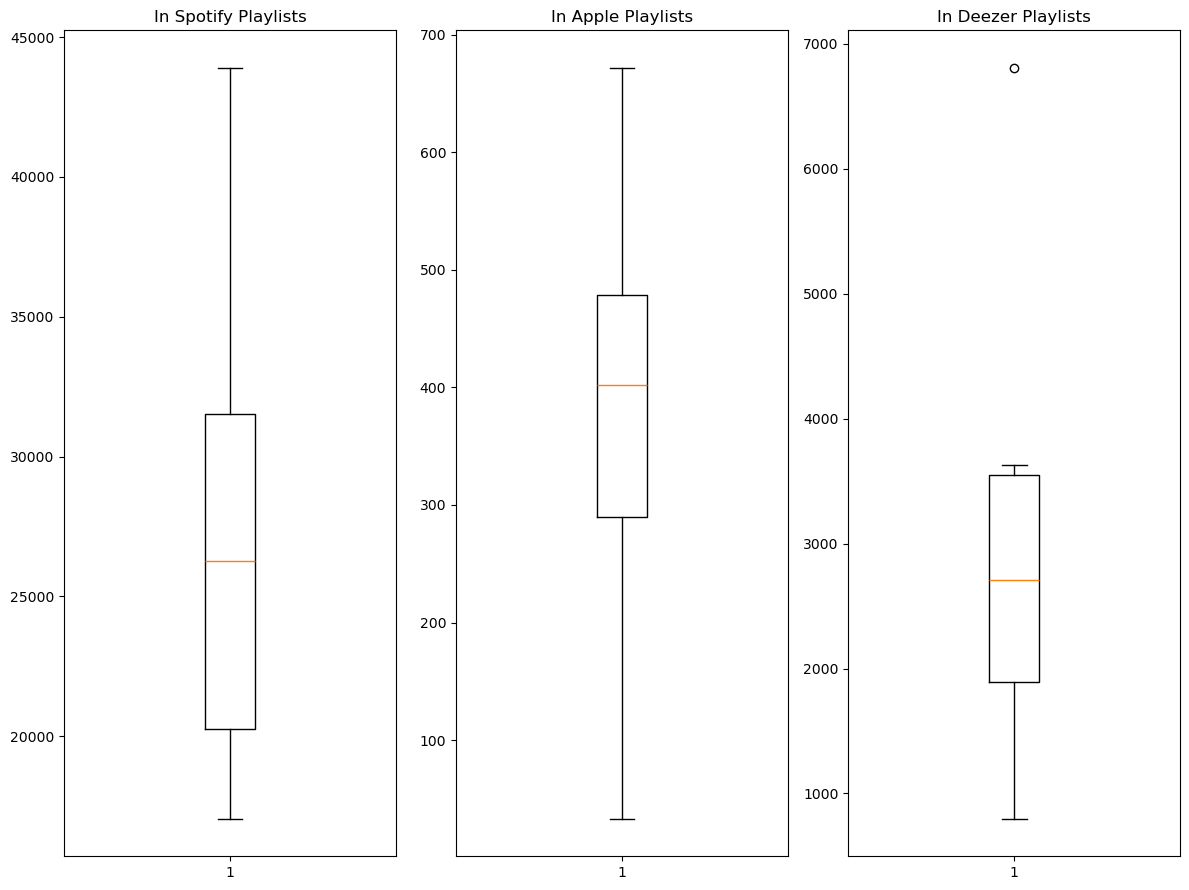

In [38]:
# Creates a figure with a large size
fig8 = plt.figure(figsize = (12, 9))

# Adds a plot for spotify
spTopPPlot = fig8.add_subplot(131)
spTopPPlot.boxplot(top['in_spotify_playlists'])
spTopPPlot.set_title("In Spotify Playlists")

# Adds a plot for apple music
apTopPPlot = fig8.add_subplot(132)
apTopPPlot.boxplot(top['in_apple_playlists'])
apTopPPlot.set_title("In Apple Playlists")

# Adds a plot for deezer
deTopPPlot = fig8.add_subplot(133)
deTopPPlot.boxplot(top['in_deezer_playlists'])
deTopPPlot.set_title("In Deezer Playlists")

plt.tight_layout() 
plt.show()

## Advanced Analysis

Based on the streams data, can you identify any patterns among tracks with the same key or mode (Major vs. Minor)?
Do certain genres or artists consistently appear in more playlists or charts? Perform an analysis to compare the most frequently appearing artists in playlists or charts.

In [40]:
# Replaces missing values with the key of C
spd['key'] = spd['key'].replace("", "C")
spd['key'] = spd['key'].fillna("C")

# Tests if it works
spd.loc[spd['track_name'] =='Flowers']

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
12,Flowers,Miley Cyrus,1,2023,1,12,12211,115,1.316856e+09,300,...,118,C,Major,71,65,68,6,0,3,7
825,Flowers,Lauren Spencer Smith,1,2021,8,9,801,0,1.848264e+08,42,...,138,D#,Major,70,31,44,84,0,9,39


In [41]:
# Groups the Streams per key using the group by function 
streams_per_key = spd.groupby('key')['streams'].sum()
streams_per_key

key
A     3.025426e+10
A#    3.149110e+10
B     4.206718e+10
C     4.951329e+10
C#    7.251363e+10
D     4.289157e+10
D#    1.825021e+10
E     3.580483e+10
F     4.169173e+10
F#    3.813251e+10
G     4.344954e+10
G#    4.339898e+10
Name: streams, dtype: float64

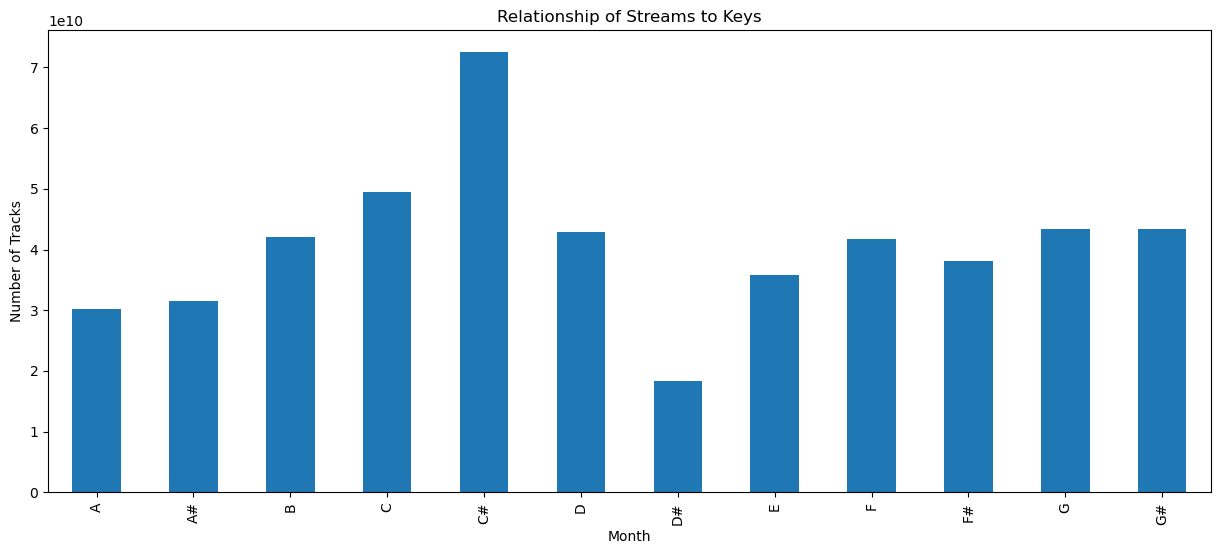

In [42]:
# Increase the figure size
fig9 = plt.figure(figsize=(15, 6)) 
ax = fig9.add_subplot(111)

# Plots the histogram 
streams_per_key.plot(kind = 'bar')
plt.title('Relationship of Streams to Keys')

# Adds label to the x axis 
plt.ylabel('Number of Tracks')
plt.xlabel('Month')
plt.show()



In [43]:
# Similar to what I did in keys, I grouped the modes. 
streams_per_mode = spd.groupby('mode')['streams'].sum()
streams_per_mode

mode
Major    2.936232e+11
Minor    1.958356e+11
Name: streams, dtype: float64

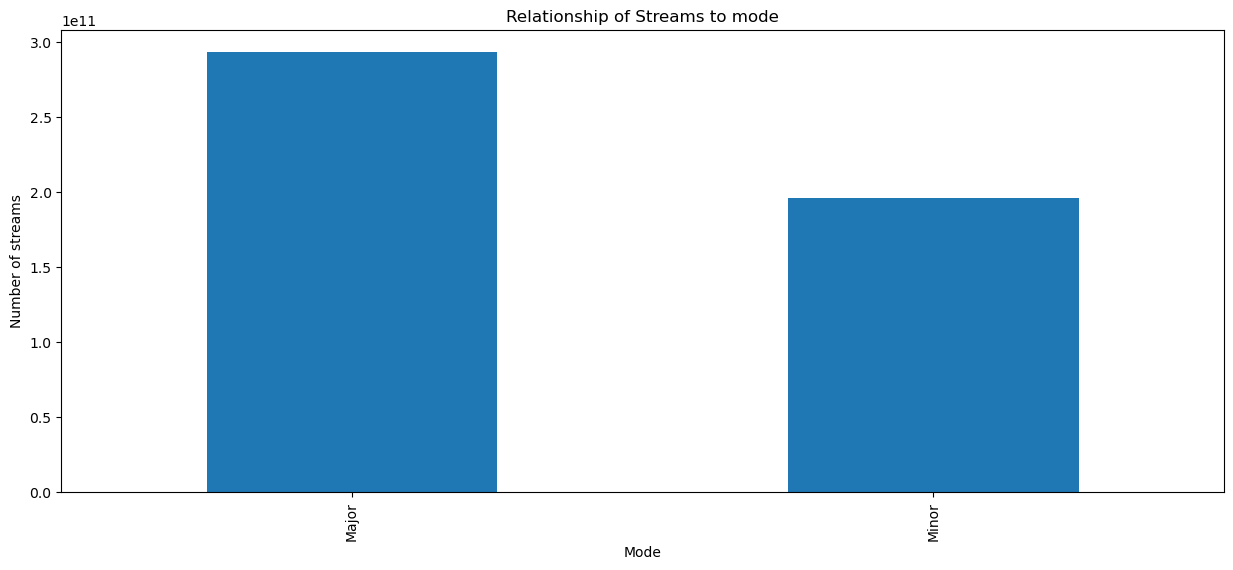

In [44]:
# Increase the figure size
fig10 = plt.figure(figsize=(15, 6)) 
ax = fig10.add_subplot(111)

# Plots the histogram 
streams_per_mode.plot(kind = 'bar')
plt.title('Relationship of Streams to mode')

# Adds label to the x  and y axis 
plt.ylabel('Number of streams')
plt.xlabel('Mode')
plt.show()


In [45]:
# Groups artist by name and only get the column of spotify, apple, deezer, and shazam 's playlists and charts
ArtChart = spd.groupby('artist(s)_name')[['in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists', 'in_apple_charts',	'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts']].sum()
ArtChart

,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts
artist(s)_name,,,,,,,
(G)I-DLE,881,39,24,242,16,0,159
"21 Savage, Gunna",807,0,3,0,5,0,0
"24kgoldn, Iann Dior",12854,0,237,27,636,0,0
50 Cent,30427,7,235,106,5221,1,35
"A$AP Rocky, Metro Boomin, Roisee",727,16,17,60,28,1,44
...,...,...,...,...,...,...,...
j-hope,565,0,6,52,11,0,0
"j-hope, J. Cole",615,2,22,82,8,0,9
sped up 8282,472,2,0,0,6,0,0


In [46]:
# Adds the number of appearances of each artists
ArtChart['total_appearances'] = ArtChart.sum(axis=1)

#Sorts to show only the top 10 artists
top10A = ArtChart.sort_values('total_appearances', ascending=False).head(10)
top10A

,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,total_appearances
artist(s)_name,,,,,,,,
The Weeknd,144053,180,1677,1348,7551,23,854,155686
Ed Sheeran,128758,94,1448,488,16952,43,874,148657
Taylor Swift,132974,542,1796,1866,3086,58,1811,142133
Harry Styles,110026,185,1741,545,3695,76,282,116550
Eminem,87331,152,475,281,15121,12,272,103644
Arctic Monkeys,84016,190,241,340,4992,6,101,89886
Coldplay,75716,72,381,25,12727,10,0,88931
"Dr. Dre, Snoop Dogg",65728,0,283,118,12042,2,953,79126
Avicii,68241,42,407,282,7566,1,101,76640


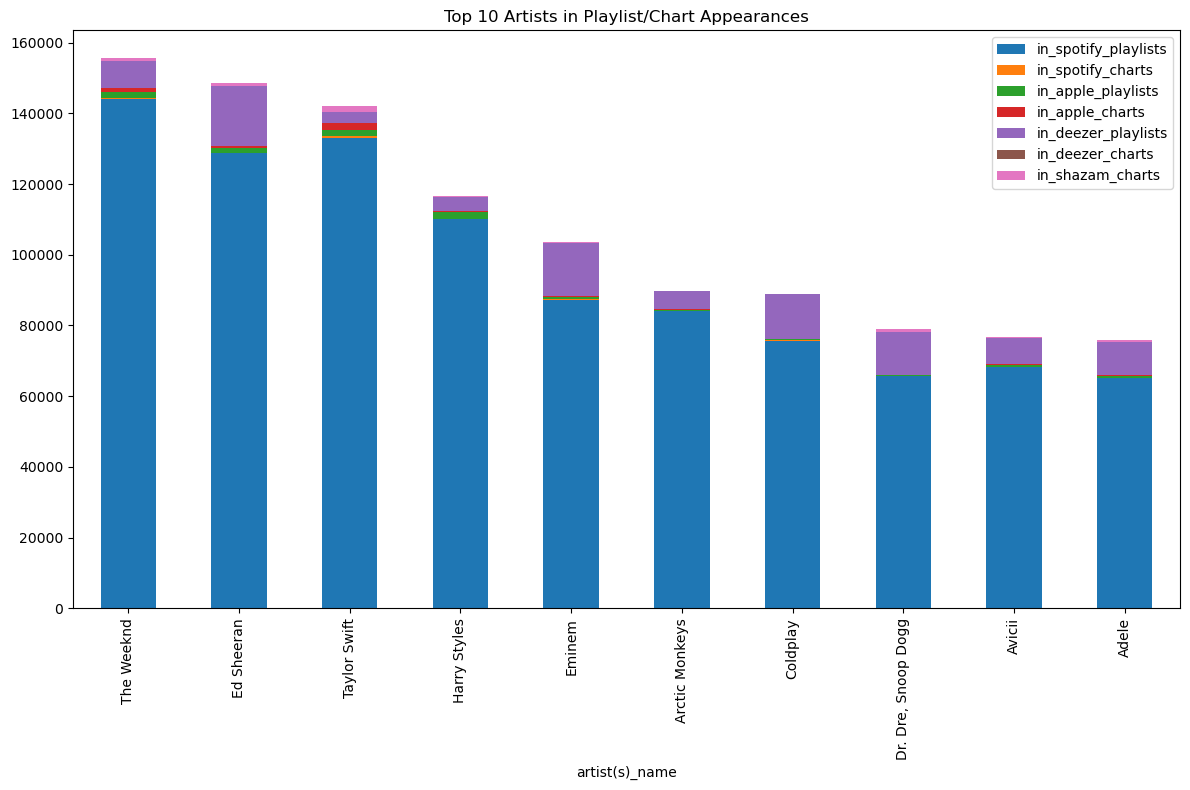

In [47]:
# Graphs the value, enabling stacking for better readability
top10A[['in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists','in_apple_charts','in_deezer_playlists', 'in_deezer_charts','in_shazam_charts']].plot(kind='bar', stacked=True, figsize=(12, 8))

# Adds legends and labels cause why not
plt.title("Top 10 Artists in Playlist/Chart Appearances")
plt.legend()

plt.tight_layout()
plt.show()